In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [7]:
 # images, width, height, color scale 1 for gray scale and 3 dimension for RGB

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
       

In [8]:
#W Checking the image sizes

X_train.max(), X_train.min()

(255, 0)

In [9]:
X_test.max(), X_test.min()

(255, 0)

In [10]:
# SCaling the data / normalizing the data

X_train = X_train /255
X_test = X_test /255

In [11]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [12]:
X_test.max(), X_test.min()

(1.0, 0.0)

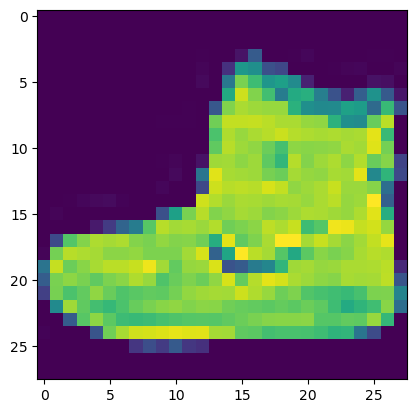

In [13]:
plt.imshow(X_train[0]);

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
X_train[0].shape

(28, 28, 1)

In [17]:
# converting the y_train, y_test into categories for one hot encoding 

from tensorflow.keras.utils import to_categorical

In [18]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
y_train_cat , y_test_cat

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [22]:
28*28*1

784

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
# Creating the model 

model = Sequential()

model.add(Conv2D(filters= 32,kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# adding a dense layer
model.add(Dense(units = 128, activation='relu'))


# adding outplut layer with dense layers as number of classes 
# fro multiclass classfication proble wee use activation function of Softmax
model.add(Dense(units=10, activation='softmax'))

# Compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



C:\Users\theed\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# it will show how many dense layers i mean entire summary of Neural network

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping( monitor='val_loss',
                                                patience=2)
                                                

In [28]:
# Fitting the model

model.fit(X_train, y_train_cat,epochs= 20,callbacks=[early_stop], validation_data=(X_test, y_test_cat))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8021 - loss: 0.5601 - val_accuracy: 0.8812 - val_loss: 0.3350
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8920 - loss: 0.2977 - val_accuracy: 0.8875 - val_loss: 0.3094
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9113 - loss: 0.2395 - val_accuracy: 0.9002 - val_loss: 0.2706
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9232 - loss: 0.2067 - val_accuracy: 0.9014 - val_loss: 0.2705
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9336 - loss: 0.1796 - val_accuracy: 0.9067 - val_loss: 0.2656
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9418 - loss: 0.1568 - val_accuracy: 0.9135 - val_loss: 0.2657
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9534 - loss: 0.1276 - val_accuracy: 0.9092 - val_loss: 0.2761


In [29]:
# Evaluating the model

losses = pd.DataFrame(model.history.history)

In [30]:
losses

,accuracy,loss,val_accuracy,val_loss
0,0.849733,0.423998,0.8812,0.334968
1,0.895183,0.289688,0.8875,0.309403
2,0.909900,0.243049,0.9002,0.270622
3,0.922967,0.209079,0.9014,0.270490
4,0.932683,0.181941,0.9067,0.265593
5,0.942133,0.156793,0.9135,0.265712
6,0.951583,0.131887,0.9092,0.276136


<Axes: >

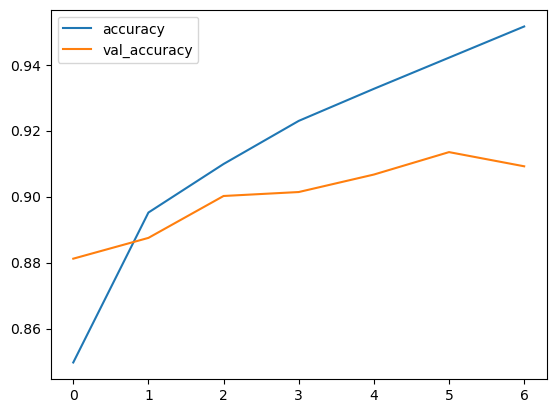

In [31]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

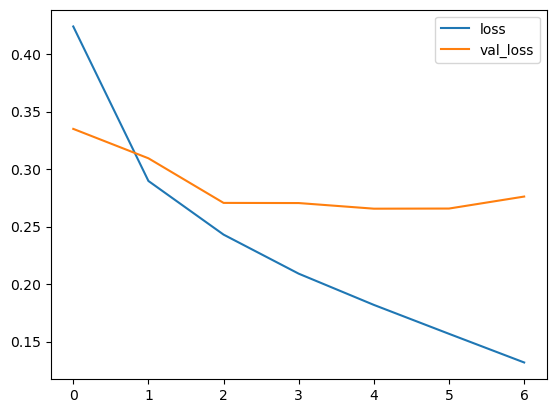

In [32]:
losses[['loss', 'val_loss']].plot()

In [33]:
# model evulaltion

model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.2903


[0.27613624930381775, 0.9092000126838684]

In [34]:
# getting predictions of our entire test dataset

predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
predictions = predictions.argmax(axis=-1)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(confusion_matrix(y_test, predictions))

[[839   3  27   6   5   1 114   0   5   0]
 [  3 985   1   4   3   0   4   0   0   0]
 [ 13   1 846   4  72   0  64   0   0   0]
 [ 19   7  18 879  33   0  43   0   1   0]
 [  0   2  54  11 886   0  47   0   0   0]
 [  0   0   0   0   0 984   0   6   0  10]
 [ 90   2  58  12  76   0 756   0   6   0]
 [  0   0   0   0   0  15   0 967   0  18]
 [  3   0   5   0   2   1   2   1 986   0]
 [  0   0   0   0   0   6   1  29   0 964]]


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.85      0.84      1000
           3       0.96      0.88      0.92      1000
           4       0.82      0.89      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.76      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Predicting on unseen data 

In [59]:
# getting any random image from the data set 
num = 20
new_image = X_train[num]

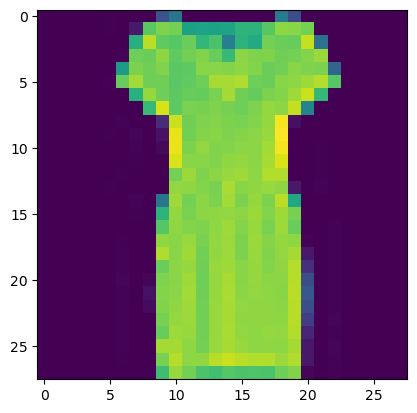

In [60]:
plt.imshow(new_image)

In [61]:
## looks like a shoe  # our model should return 5 
y_train[num] 

3

In [62]:
# since we are taking a new imge from our scaled version so no need to scale the data 
new_image.min(),new_image.max()

(0.0, 1.0)

In [63]:
new_image.shape

(28, 28, 1)

In [64]:
# our model trained on shape of  1,28,28,1

In [65]:
new_image = new_image.reshape(1,28,28,1)

In [66]:
predit = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [67]:
predit.argmax(axis=-1)

array([3], dtype=int64)